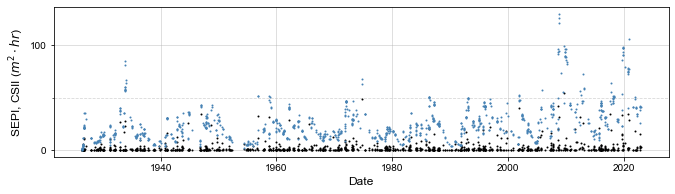

<function matplotlib.pyplot.clf()>

In [18]:
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from dateutil import parser
import numpy as np


plt.rcParams["font.family"] = "Arial"

# Make plots for all stations with a single delta value
delta = 0.3
delta_str = str(delta).replace('.', '-')

# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 280
fig_height_mm = 70

fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch

# Create the figure with the specified size in millimeters
plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Define the folder name within the current directory
# folder_name = 'AnnualFiles'
#directory = "Final_Storm_Results"


# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder_path = os.path.join(parent_dir, "Final_Storm_Results")

# Create the path to the folder within the current directory
filenames = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, f) for f in filenames]

# Create the path to the folder within the current directory
#folder_path = os.path.join('.', directory)
#filenames = os.listdir(folder_path)
#file_paths = [os.path.join(folder_path, f) for f in filenames]

# Get a list of all CSV files in the directory
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
file_names = sorted(file_names)

now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
directoryName = os.path.abspath(f"Compare_Plots_delta_{delta_str}")

if not os.path.exists(directoryName):
    os.makedirs(directoryName)
    
# Set the vertical offset
vertical_offset = 0
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'deeppink', 'gray', 'olive', 'lightseagreen', 'magenta', 'steelblue']

label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy H.", "Atlantic C.", "Sewell's P.", "Willmington", "Charleston", "Fernand. B.", "Key West"]

# Create a list to store the dataframes
dfs = []
i = 0


for i, file_name in enumerate(file_names):
    if i == 11:         # Chamge for different locations
        filelabel = label_list[i % len(label_list)]
        output_path = os.path.join(directoryName, filelabel + ".jpeg")


        if file_name.endswith(".csv"):
            filepath = os.path.join(folder_path, file_name)
            with open(filepath) as f:
                reader = csv.reader(f)
                next(reader)  # skip the header row
                dates = []
                sepi = []
                tp = []
                result = []

                for row in reader:
                    date = parser.parse(row[0]).date()
                    sepi_val = float(row[1])
                    tp_val = float(row[2])
                    dates.append(date)
                    sepi.append(sepi_val)
                    tp.append(tp_val)

            tau_p = [t / 365 for t in tp]
            csii = [sepi[0]]
            for j in range(1, len(sepi)):
                csii_val = sepi[j] + csii[j-1] * delta ** tau_p[j]
                csii.append(csii_val)

            for num in csii:
                result.append(num + vertical_offset)

            plt.plot(dates, sepi, marker='o', markersize = 1.0, color="black", linewidth = .5, label=label_list[i], linestyle = "None")
            plt.plot(dates, result, marker='o', markersize = 1.0, color=colors[i % len(colors)], linewidth = .5, label=label_list[i], linestyle = "None")
            #vertical_offset -= 300.0
            i += 1
        


plt.grid(True, which='major', axis='x', alpha=0.5, linestyle='-')
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(200))

# Set the major grid lines for y ax
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))

# Set the minor grid lines for the y-axis
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(50))

#plt.ylim(-100, 3700)
#plt.xlim(1910,2055)

#xticks = [1920, 1940, 1960, 1980, 2000, 2020]
#plt.xticks(xticks)

plt.xlabel("Date", fontsize=12)
plt.ylabel("SEPI, CSII ($m^2 \cdot hr$)", fontsize=12)

#plt.tick_params(axis='both', labelsize=10)
        
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
plt.clf
